In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py

In [27]:
params = {"ytick.color" : "g",
          "xtick.color" : "g",
          "axes.labelcolor" : "g",
          "axes.edgecolor" : "g",
          "text.color" : "g",
         }
plt.rcParams.update(params)

In [28]:
file = h5py.File('data/split_electrode/numerical_split_electrode_test_vary_radii.h5', 'r')
file.keys()

[u'V_o',
 u'X',
 u'Z',
 u'delta',
 u'disk_radii',
 u'disk_separation',
 u'hole_radii',
 u'lenX',
 u'lenZ',
 u'potential',
 u'time_elapsed']

In [29]:
V_o = file['V_o']
lenX = file['lenX'][()]
lenZ = file['lenZ'][()]
X = file['X'][:,:]
Z = file['Z'][:,:]
U = file['potential'][:,:,:]
disk_radii = file['disk_radii'][()]
hole_radii = file['hole_radii'][:]
disk_separation = file['disk_separation'][()]
delta = file['delta'][()]

In [30]:
E_U = np.empty((int(lenZ/delta)+1,int(lenX/delta),len(hole_radii)))
E_V = np.empty((int(lenZ/delta)+1,int(lenX/delta),len(hole_radii)))
Flux_rad = 500e-6
E_flux_rad = np.empty((int(Flux_rad/delta),len(hole_radii)))
Ez_flux = np.empty((len(hole_radii)))
Ez_center = np.empty((len(hole_radii)))
x_center = len(X[:,0])/2

for i in range(0, len(hole_radii)):
    E_U[:,:,i], E_V[:,:,i] = np.gradient(U[:,:,i], delta)
    E_U[:,:,i] = -1.0*E_U[:,:,i]
    E_V[:,:,i] = -1.0*E_V[:,:,i]

    E_flux_rad[:,i] = E_U[int(lenZ/delta)/2,x_center:x_center+int(Flux_rad/delta),i]
    Ez_flux[i] = np.sum(E_flux_rad[:,i])*2.0*np.pi
    Ez_center[i] = E_flux_rad[0,i]

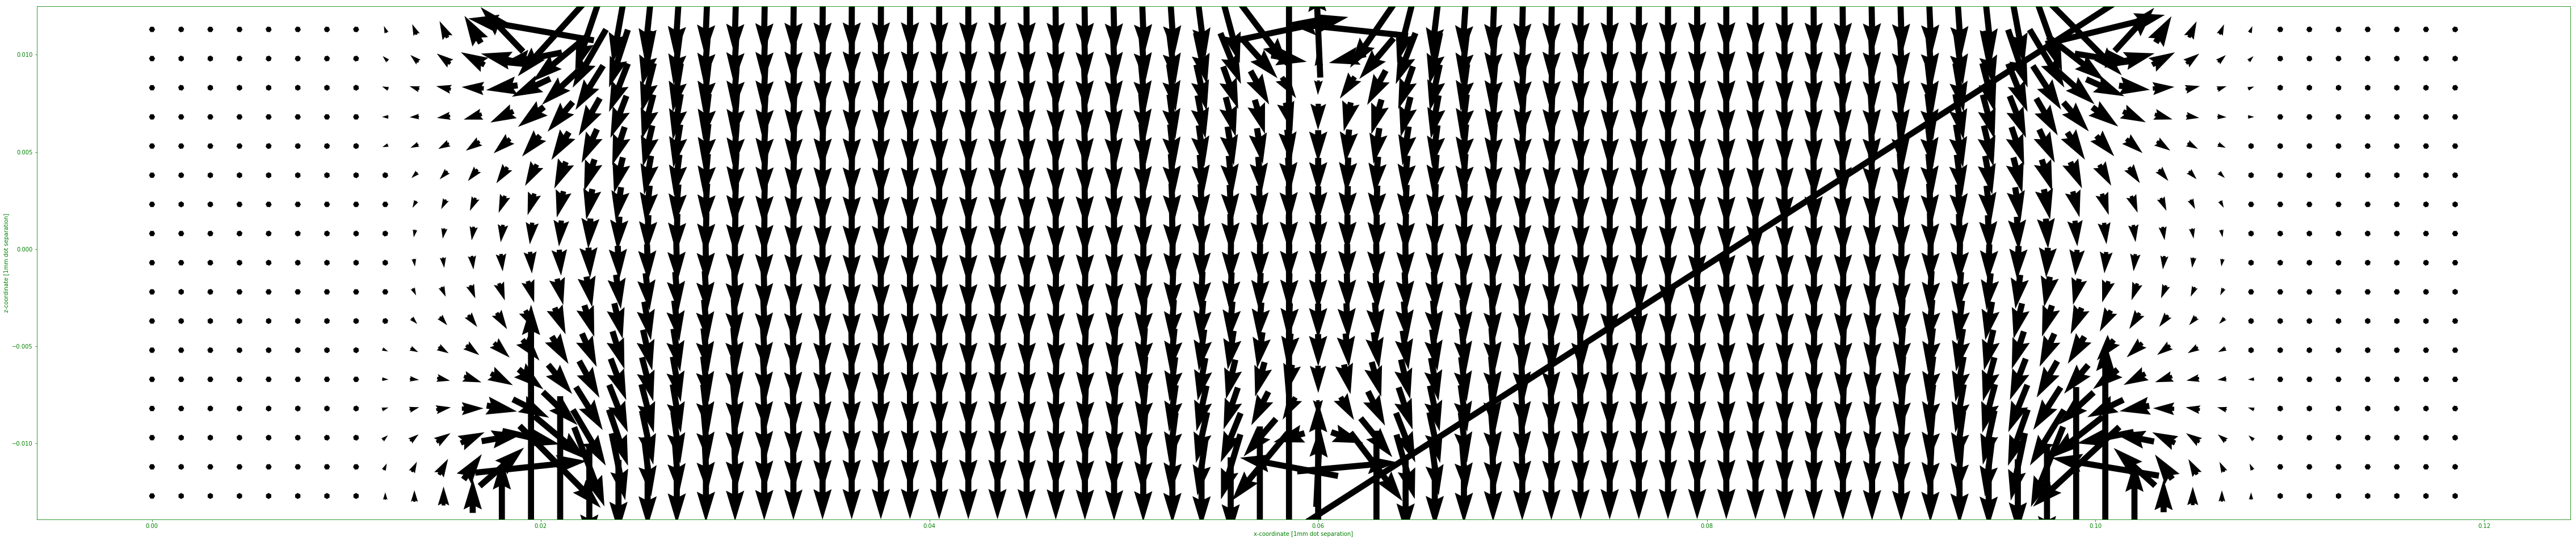

In [78]:
skip = 15
fig, ax = plt.subplots(figsize=(80, 40))
q = ax.quiver(X[::skip,::skip], Z[::skip,::skip], E_V[::skip,::skip,7], E_U[::skip,::skip,7], units='xy', pivot='mid', cmap='magma')
ax.set_aspect('equal')
plt.xlabel('x-coordinate [1mm dot separation]')
plt.ylabel('z-coordinate [1mm dot separation]')
plt.show()

Text(0.5,1,'500.0 [$\\mu$m] flux radius, 0.04 [m] plate radius, 0.0254 [m] plate separation')

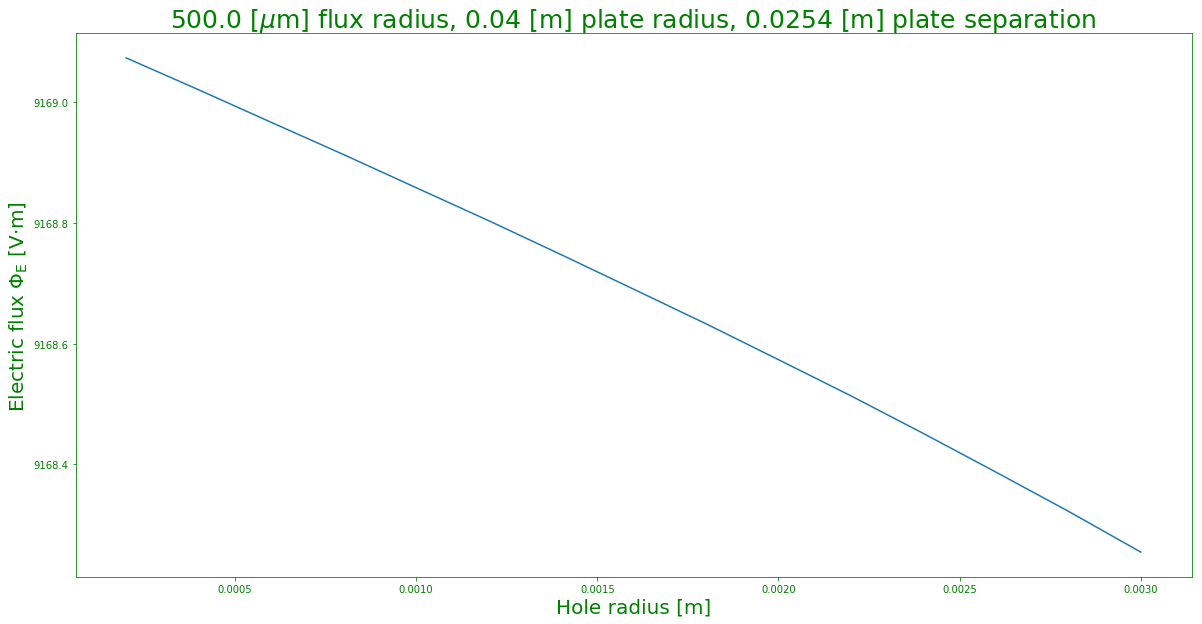

In [74]:
figure = plt.figure(figsize=(20,10))
plt.plot(hole_radii, abs(Ez_flux))
plt.xlabel('Hole radius [m]',fontsize=20)
plt.ylabel('Electric flux $\Phi_\mathrm{E}$ [V$\cdot$m] ',fontsize=20)
plt.title('{} [$\mu$m] flux radius, {} [m] plate radius, {} [m] plate separation'.format(Flux_rad*1e6, disk_radii, disk_separation), fontsize=25)

Text(0.5,1,'500.0 [$\\mu$m] flux radius, 0.04 [m] plate radius, 0.0254 [m] plate separation')

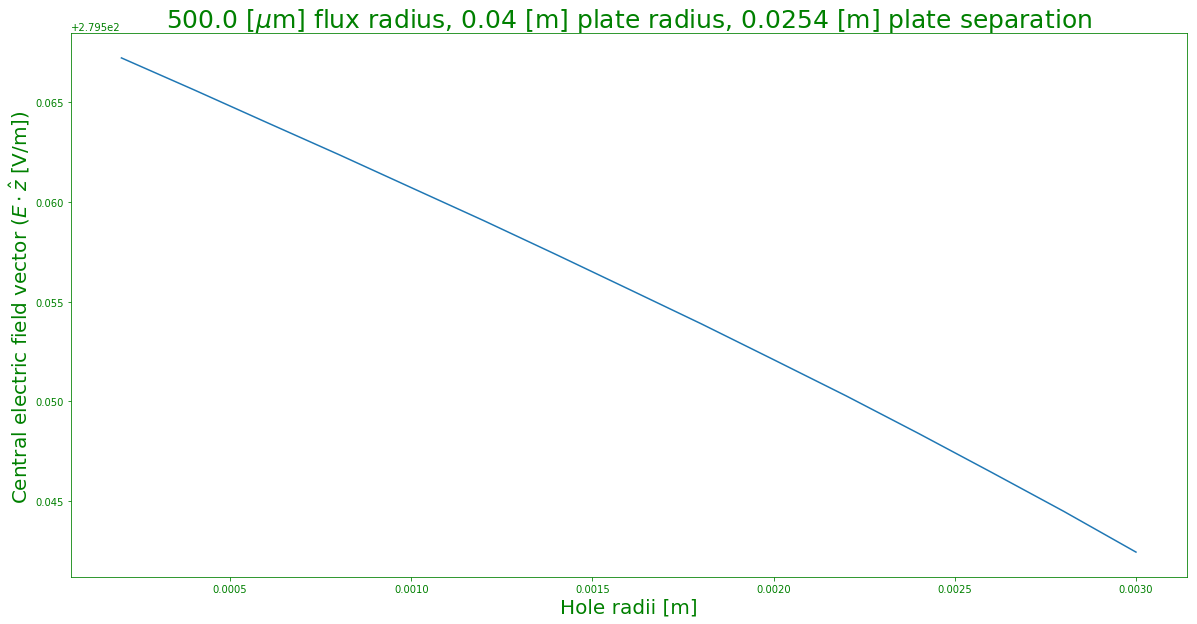

In [56]:
figure = plt.figure(figsize=(20,10))
plt.plot(hole_radii, abs(Ez_center))
plt.xlabel('Hole radii [m]',fontsize=20)
plt.ylabel('Central electric field vector ($E\cdot\hat{z}$ [V/m]) ',fontsize=20)
plt.title('{} [$\mu$m] flux radius, {} [m] plate radius, {} [m] plate separation'.format(Flux_rad*1e6, disk_radii, disk_separation), fontsize=25)

In [70]:
deriv = abs(Ez_center[1:])-abs(Ez_center[:-1])

In [73]:
abs(deriv)[-1]/abs(Ez_center[-1])

7.340977440641307e-06

#### It looks like $\frac{\mathrm{d}E\hat{z}}{\mathrm{d}r_\mathrm{hole}}$ within 6 mm diameter hole sizes are less than 10 ppm of the electric field. So varying this hole up to this size seems pretty negligible. Keep in mind that this derivative appears to decrease quadratically so for larger hole sizes this could be of concern but we are more than likely will not go larger than a 6 mm diameter hole size. This 10 ppm figure could very well change as we vary the plate separation and diameter of the disk

In [91]:
Ez_center[0]

-279.56722819777934

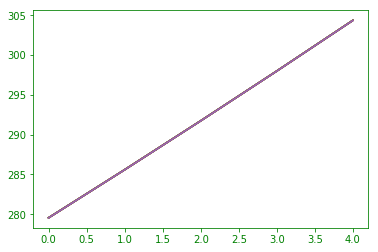

In [51]:
## Plotting E-field strength as a function of the distance from the center of the flux surface
for i in range(0,len(E_flux_rad[0,:])):
    plt.plot(np.arange(500e-6,abs(E_flux_rad[:,i]))


In [23]:
time_elapsed = file['time_elapsed'][()]

In [24]:
time_elapsed

44075.62365412712